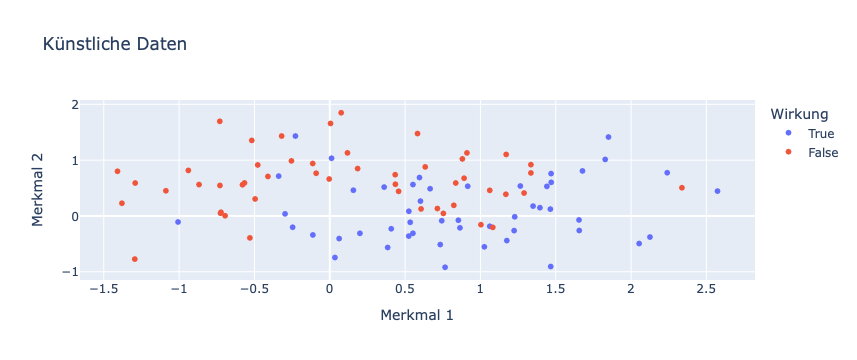

In [2]:
import pandas as pd
import plotly.express as px
from sklearn.datasets import make_moons 

X_array, y_array = make_moons(noise = 0.5, n_samples=100, random_state=3)
daten = pd.DataFrame({
    'Merkmal 1': X_array[:,0],
    'Merkmal 2': X_array[:,1],
    'Wirkung': y_array
})
daten['Wirkung'] = daten['Wirkung'].astype('bool')

fig = px.scatter(daten, x = 'Merkmal 1', y = 'Merkmal 2', color='Wirkung',
    title='Künstliche Daten')
fig.show()

In [12]:
from numpy import mean, std
from sklearn.model_selection import cross_validate, KFold
from sklearn.tree import DecisionTreeClassifier

X = daten[['Merkmal 1', 'Merkmal 2']]
y = daten['Wirkung']

kfold = KFold(n_splits=10)

for max_tiefe in [3, 4, 5, 6]:
    modell = DecisionTreeClassifier(max_depth=max_tiefe)
    cv_results_modell = cross_validate(modell, X,y, cv=kfold)
    test_scores = cv_results_modell['test_score']
    print(f'Mittelwert Testscores: {mean(test_scores):.2f}, Standardabweichung: {std(test_scores):.2f}')



Mittelwert Testscores: 0.77, Standardabweichung: 0.14
Mittelwert Testscores: 0.69, Standardabweichung: 0.10
Mittelwert Testscores: 0.74, Standardabweichung: 0.08
Mittelwert Testscores: 0.72, Standardabweichung: 0.12


In [17]:
for min_punkte in [1, 2, 3]:
    modell = DecisionTreeClassifier(min_samples_leaf=min_punkte)
    cv_results_modell = cross_validate(modell, X,y, cv=kfold)
    test_scores = cv_results_modell['test_score']
    print(f'Mittelwert Testscores: {mean(test_scores):.2f}, Standardabweichung: {std(test_scores):.2f}')

Mittelwert Testscores: 0.70, Standardabweichung: 0.08
Mittelwert Testscores: 0.71, Standardabweichung: 0.14
Mittelwert Testscores: 0.74, Standardabweichung: 0.12


In [18]:
for max_tiefe in [3, 4, 5, 6]:
    for min_punkte in [1, 2, 3]:
        modell = DecisionTreeClassifier(max_depth=max_tiefe, min_samples_leaf=min_punkte)
        cv_results_modell = cross_validate(modell, X,y, cv=kfold)
        test_scores = cv_results_modell['test_score']
        print(f'Mittelwert Testscores: {mean(test_scores):.2f}, Standardabweichung: {std(test_scores):.2f}')

Mittelwert Testscores: 0.75, Standardabweichung: 0.15
Mittelwert Testscores: 0.78, Standardabweichung: 0.15
Mittelwert Testscores: 0.78, Standardabweichung: 0.13
Mittelwert Testscores: 0.71, Standardabweichung: 0.10
Mittelwert Testscores: 0.72, Standardabweichung: 0.12
Mittelwert Testscores: 0.74, Standardabweichung: 0.11
Mittelwert Testscores: 0.72, Standardabweichung: 0.11
Mittelwert Testscores: 0.75, Standardabweichung: 0.09
Mittelwert Testscores: 0.77, Standardabweichung: 0.09
Mittelwert Testscores: 0.70, Standardabweichung: 0.13
Mittelwert Testscores: 0.71, Standardabweichung: 0.14
Mittelwert Testscores: 0.74, Standardabweichung: 0.12


In [20]:
from sklearn.model_selection import GridSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

parameter_gitter = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3]
}

optimiertes_modell = GridSearchCV(DecisionTreeClassifier(), param_grid=parameter_gitter, cv=kfold)
optimiertes_modell.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3]})

In [25]:
ergebnisse_kreuzvalidierung = pd.DataFrame(optimiertes_modell.cv_results_)
ergebnisse_kreuzvalidierung.head(12)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001118,0.000551,0.000870,0.000491,3,1,"{'max_depth': 3, 'min_samples_leaf': 1}",0.375,0.875,0.625,0.750,1.000,1.000000,0.857143,0.714286,0.428571,0.571429,0.719643,0.208715,5
1,0.000683,0.000051,0.000563,0.000033,3,2,"{'max_depth': 3, 'min_samples_leaf': 2}",0.375,0.875,0.750,0.750,1.000,1.000000,0.857143,0.714286,0.428571,0.571429,0.732143,0.206403,3
2,0.000579,0.000021,0.000485,0.000016,3,3,"{'max_depth': 3, 'min_samples_leaf': 3}",0.375,0.875,0.625,0.875,1.000,1.000000,0.857143,0.714286,0.428571,0.571429,0.732143,0.213839,3
3,0.000567,0.000050,0.000478,0.000043,4,1,"{'max_depth': 4, 'min_samples_leaf': 1}",0.375,0.750,0.500,0.750,0.875,0.714286,0.857143,0.714286,0.428571,0.714286,0.667857,0.164286,9
4,0.000514,0.000017,0.000428,0.000010,4,2,"{'max_depth': 4, 'min_samples_leaf': 2}",0.375,0.750,0.500,0.750,1.000,1.000000,0.857143,0.714286,0.428571,0.714286,0.708929,0.207027,6
5,0.000484,0.000006,0.000405,0.000007,4,3,"{'max_depth': 4, 'min_samples_leaf': 3}",0.375,0.875,0.625,0.875,0.875,1.000000,0.857143,0.714286,0.428571,0.714286,0.733929,0.195036,2
6,0.000479,0.000019,0.000392,0.000012,5,1,"{'max_depth': 5, 'min_samples_leaf': 1}",0.375,0.625,0.625,0.500,0.875,0.857143,0.714286,0.714286,0.428571,0.714286,0.642857,0.159319,10
7,0.000469,0.000010,0.000389,0.000007,5,2,"{'max_depth': 5, 'min_samples_leaf': 2}",0.375,0.625,0.500,0.500,0.875,0.857143,0.714286,0.714286,0.428571,0.714286,0.630357,0.165031,11
8,0.000504,0.000042,0.000422,0.000048,5,3,"{'max_depth': 5, 'min_samples_leaf': 3}",0.250,0.750,0.625,0.625,0.875,1.000000,0.714286,0.714286,0.428571,0.714286,0.669643,0.200486,7
9,0.000512,0.000073,0.000403,0.000020,6,1,"{'max_depth': 6, 'min_samples_leaf': 1}",0.250,0.625,0.625,0.500,0.750,0.714286,0.857143,0.714286,0.285714,0.857143,0.617857,0.202535,12


In [26]:
from math import mean, std

ImportError: cannot import name 'mean' from 'math' (/opt/homebrew/Caskroom/miniconda/base/envs/python312/lib/python3.12/lib-dynload/math.cpython-312-darwin.so)